In [1]:
from ramCOH import functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout(colors=ps.colors.vitaminC)

In [2]:
ol_file = "./olivine/PI097-01_2021_11_19_10_55_14_532nm_Edge_100%_x100_VIS_LWD_H50_1800 (450-850nm)_10s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

ram.olivine.birs

array([[ 100,  185],
       [ 260,  272],
       [ 370,  380],
       [ 470,  515],
       [ 660,  700],
       [1100, 4000]])

In [3]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect(olivine.birs, smooth_factor=1)
olivine.calculate_noise()
olivine.noise

1.5373712249912752

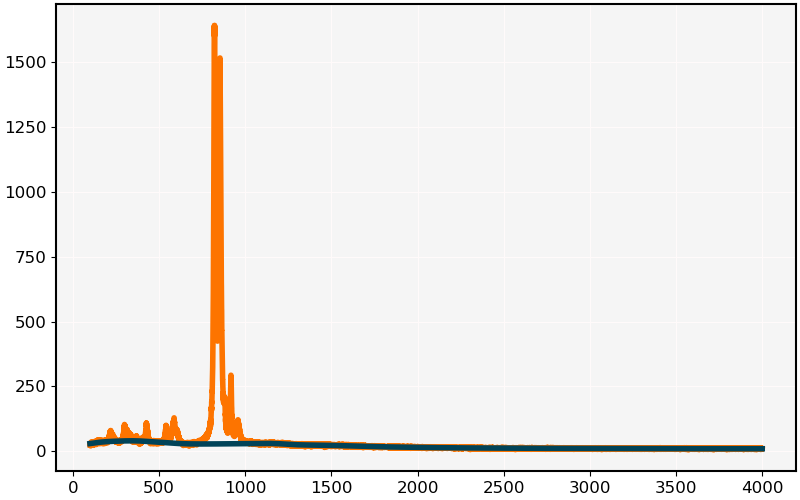

In [9]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.plot(x, olivine.baseline)

# plt.plot(olivine.x, olivine.intensities["BC"])

plt.show()

In [7]:
olivine.deconvolve(noise_threshold=2, peak_prominence=3, min_amplitude=8, min_peak_width=4, fit_window=4)

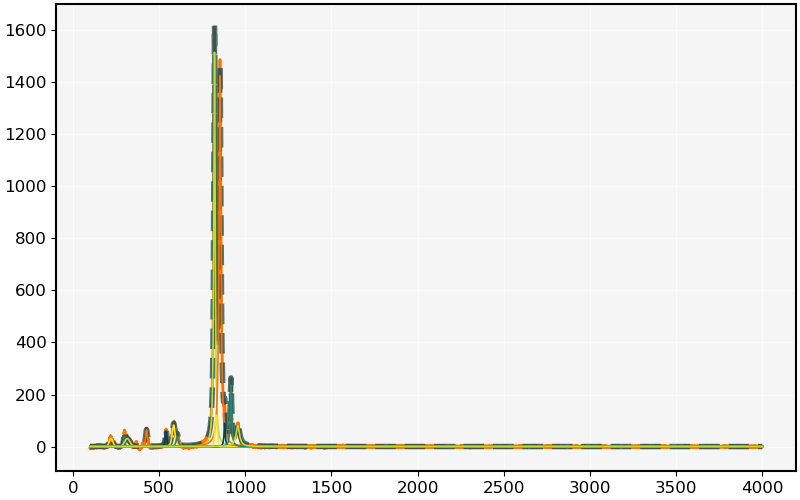

In [11]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, f.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.deconvoluted_peaks:
    plt.plot(olivine.x, f.GaussLorentz(olivine.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)